# Lonlat ms diagnosis on main combination
- compute residual
- compute correlated and uncorrelated part of each term -> evaluate contribution in th H1 hypothesis (correlated part = physical signal)
- evaluate H1

In [8]:
import numpy as np
import pandas as pd
import xarray as xr

import os
from glob import glob

import matplotlib.pyplot as plt


import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.geodesic as cgeo
crs = ccrs.PlateCarree()
import cmocean.cm as cm

import histlib.matchup as match
import histlib.diagnosis as diag
from histlib.cstes import labels, zarr_dir, matchup_dir
from histlib.matchup import _data_var, _stress_var, _aviso_var

In [9]:
DL =25*1e3 #meters
DT = int(1800) #seconds
dl=5
id_aviso = 'aviso__0__adt__es_cstrio_z15__alti_x'
id_co = 'co__0__adt_filtered_ocean_tide_internal_tide__es_cstrio_z15__alti_x'

var =['nb_coloc_bin',
 'exc_acc_co__0__adt_filtered__es_cstrio_z15__drifter_x',
 'exc_coriolis_co__0__adt_filtered__es_cstrio_z15__drifter_x',
 'exc_ggrad_co__0__adt_filtered__es_cstrio_z15__drifter_x',
 'exc_wind_co__0__adt_filtered__es_cstrio_z15__drifter_x',
 'sum_co__0__adt_filtered__es_cstrio_z15__drifter_x',
 'exc_acc_aviso__0__adt__es_cstrio_z15__alti_x',
 'exc_coriolis_aviso__0__adt__es_cstrio_z15__alti_x',
 'exc_ggrad_aviso__0__adt__es_cstrio_z15__alti_x',
 'exc_wind_aviso__0__adt__es_cstrio_z15__alti_x',
 'sum_aviso__0__adt__es_cstrio_z15__alti_x',
 'drifter_acc_x_0',
 'drifter_coriolis_x_0',
 'alti_ggx_adt_filtered',
 'es_cstrio_z15_drifter_wd_x',
 'drifter_acc_x_0',
 'drifter_coriolis_x_0',
 'aviso_alti_ggx_adt',
 'es_cstrio_z15_alti_wd_x']

id_co_dic =  {'acc':'drifter_acc_x_0','coriolis':'drifter_coriolis_x_0','ggrad':'alti_ggx_adt_filtered_ocean_tide_internal_tide','wind':'es_cstrio_z15_alti_wd_x'}
id_aviso_dic =  {'acc':'drifter_acc_x_0','coriolis':'drifter_coriolis_x_0','ggrad':'aviso_alti_ggx_adt','wind':'es_cstrio_z15_alti_wd_x'}

In [7]:
def global_lonlat_ms_drifter_sat_year(dsms):
    ds = (((dsms*dsms.nb_coloc_bin).sum('drifter_sat_year'))/(dsms.nb_coloc_bin.sum('drifter_sat_year'))).drop('nb_coloc_bin')
    ds['nb_coloc_bin']=dsms.nb_coloc_bin.sum('drifter_sat_year')
    return ds

# Datasets 

In [3]:
files = glob(os.path.join(zarr_dir+'_ok',f'mslonlat/mslonlat_{int(DL//1000)}_{DT}_{dl}_drogued_*.zarr'))
files = [f for f in files if 'gps' in f]

ds = xr.open_dataset(files[0])

In [4]:
ds

<xarray.Dataset>
Dimensions:                                                                              (
                                                                                          drifter_sat_year: 1,
                                                                                          latbin: 36,
                                                                                          lonbin: 72)
Coordinates:
  * drifter_sat_year                                                                     (drifter_sat_year) <U32 ...
  * latbin                                                                               (latbin) float64 ...
  * lonbin                                                                               (lonbin) float64 ...
Data variables: (12/66)
    alti_ggx_adt_filtered                                                                (drifter_sat_year, latbin, lonbin) float64 ...
    alti_ggx_adt_filtered_ocean_tide                                                     (drifter_sat_year, latbin, lonbin) float64 ...
    alti_ggx_adt_filtered_ocean_tide_internal_tide                                       (drifter_sat_year, latbin, lonbin) float64 ...
    aviso_alti_ggx_adt                                                                   (drifter_sat_year, latbin, lonbin) float64 ...
    aviso_alti_ggy_adt                                                                   (drifter_sat_year, latbin, lonbin) float64 ...
    aviso_drifter_ggx_adt                                                                (drifter_sat_year, latbin, lonbin) float64 ...
    ...                                                                                   ...
    sum_co__0__adt_filtered__es_cstrio_z15__alti_x                                       (drifter_sat_year, latbin, lonbin) float64 ...
    sum_co__0__adt_filtered__es_cstrio_z15__drifter_x                                    (drifter_sat_year, latbin, lonbin) float64 ...
    sum_co__0__adt_filtered_ocean_tide__es_cstrio_z15__alti_x                            (drifter_sat_year, latbin, lonbin) float64 ...
    sum_co__0__adt_filtered_ocean_tide__es_cstrio_z15__drifter_x                         (drifter_sat_year, latbin, lonbin) float64 ...
    sum_co__0__adt_filtered_ocean_tide_internal_tide__es_cstrio_z15__alti_x              (drifter_sat_year, latbin, lonbin) float64 ...
    sum_co__0__adt_filtered_ocean_tide_internal_tide__es_cstrio_z15__drifter_x           (drifter_sat_year, latbin, lonbin) float64 ...

In [4]:
files = glob(os.path.join(zarr_dir+'_ok',f'mslonlat/mslonlat_{int(DL//1000)}_{DT}_{dl}_drogued_*.zarr'))
files = [f for f in files if 'gps' in f]
i=0
for f in files :
    if i==0 :
        ds = xr.open_dataset(f)
        ds.to_zarr(os.path.join(zarr_dir+'_ok',f'mslonlat_{int(DL//1000)}_{DT}_{dl}_gps_drogued.zarr'), mode='w')
        i+=1
    else :
        ds = xr.open_dataset(f)
        ds.to_zarr(os.path.join(zarr_dir+'_ok',f'mslonlat_{int(DL//1000)}_{DT}_{dl}_gps_drogued.zarr'),append_dim='drifter_sat_year')
    print(f)
    

/home/datawork-lops-osi/aponte/margot/historical_coloc_ok/mslonlat/mslonlat_25_1800_5_drogued_gps_Cryosat-2_2013.zarr
/home/datawork-lops-osi/aponte/margot/historical_coloc_ok/mslonlat/mslonlat_25_1800_5_drogued_gps_Jason-3_2018.zarr
/home/datawork-lops-osi/aponte/margot/historical_coloc_ok/mslonlat/mslonlat_25_1800_5_drogued_gps_Jason-2_2017.zarr
/home/datawork-lops-osi/aponte/margot/historical_coloc_ok/mslonlat/mslonlat_25_1800_5_drogued_gps_Jason-2_2013.zarr
/home/datawork-lops-osi/aponte/margot/historical_coloc_ok/mslonlat/mslonlat_25_1800_5_drogued_gps_Cryosat-2_2018.zarr
/home/datawork-lops-osi/aponte/margot/historical_coloc_ok/mslonlat/mslonlat_25_1800_5_drogued_gps_Cryosat-2_2010.zarr
/home/datawork-lops-osi/aponte/margot/historical_coloc_ok/mslonlat/mslonlat_25_1800_5_drogued_gps_SARAL_2016.zarr
/home/datawork-lops-osi/aponte/margot/historical_coloc_ok/mslonlat/mslonlat_25_1800_5_drogued_gps_Jason-3_2019.zarr
/home/datawork-lops-osi/aponte/margot/historical_coloc_ok/mslonlat/m

In [10]:
ds = xr.open_dataset(os.path.join(zarr_dir+'_ok',f'mslonlat_{int(DL//1000)}_{DT}_{dl}_gps_drogued.zarr'))

In [11]:
dsm = global_lonlat_ms_drifter_sat_year(ds)
dsm = dsm.where(dsm.nb_coloc_bin>0).persist()

In [12]:
dsm

<xarray.Dataset>
Dimensions:                                                                              (
                                                                                          latbin: 36,
                                                                                          lonbin: 72)
Coordinates:
  * latbin                                                                               (latbin) float64 ...
  * lonbin                                                                               (lonbin) float64 ...
Data variables: (12/66)
    alti_ggx_adt_filtered                                                                (latbin, lonbin) float64 ...
    alti_ggx_adt_filtered_ocean_tide                                                     (latbin, lonbin) float64 ...
    alti_ggx_adt_filtered_ocean_tide_internal_tide                                       (latbin, lonbin) float64 ...
    aviso_alti_ggx_adt                                                                   (latbin, lonbin) float64 ...
    aviso_alti_ggy_adt                                                                   (latbin, lonbin) float64 ...
    aviso_drifter_ggx_adt                                                                (latbin, lonbin) float64 ...
    ...                                                                                   ...
    sum_co__0__adt_filtered__es_cstrio_z15__drifter_x                                    (latbin, lonbin) float64 ...
    sum_co__0__adt_filtered_ocean_tide__es_cstrio_z15__alti_x                            (latbin, lonbin) float64 ...
    sum_co__0__adt_filtered_ocean_tide__es_cstrio_z15__drifter_x                         (latbin, lonbin) float64 ...
    sum_co__0__adt_filtered_ocean_tide_internal_tide__es_cstrio_z15__alti_x              (latbin, lonbin) float64 ...
    sum_co__0__adt_filtered_ocean_tide_internal_tide__es_cstrio_z15__drifter_x           (latbin, lonbin) float64 ...
    nb_coloc_bin                                                                         (latbin, lonbin) float64 ...

______________________
# Count

In [13]:
min_coloc_bin = 20
dsm['nb_coloc_bin'].attrs = {'long_name': 'Number of colocations per bin'}

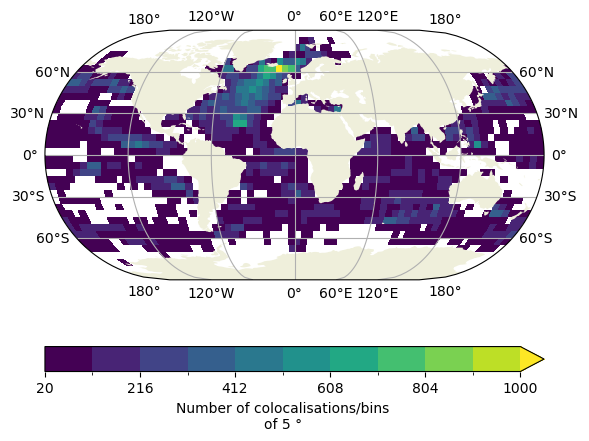

In [14]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1, projection=ccrs.EckertIII(central_longitude=0))
ax.add_feature(cfeature.LAND, zorder=2)
ds_ = dsm.where(dsm.nb_coloc_bin > min_coloc_bin).nb_coloc_bin
ds_.attrs['long_name']=f'Number of colocalisations/bins of {dl} °'
ds_.plot(x="lonbin", y="latbin", ax=ax, transform=ccrs.PlateCarree(),levels=11, vmin=20, vmax=1000, cbar_kwargs={'location':'bottom'})
#ax.set_title('(a)')# \n Colocalisations with GPS drifters')
gl = ax.gridlines(draw_labels=True,)
fig.tight_layout()

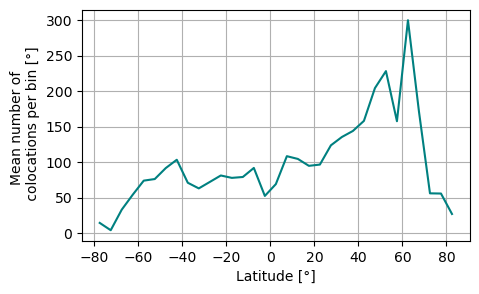

In [15]:
fig, ax = plt.subplots(1,1, figsize=(5,3))
dsm.nb_coloc_bin.mean('lonbin').plot(ax=ax, c='teal')
ax.set_xlabel('Latitude [°]')
ax.set_ylabel('Mean number of \n colocations per bin [°]')
ax.grid()

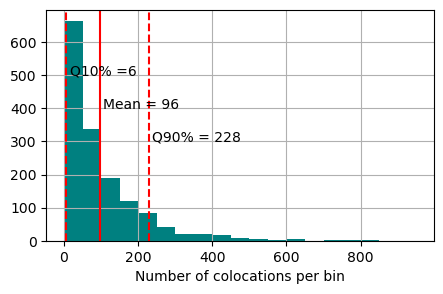

In [16]:
dd = 10

fig, ax = plt.subplots(1,1, figsize=(5,3))
hist = dsm.nb_coloc_bin.plot.hist(bins=np.arange(0,1000, 50), ax=ax, color='teal')
mean = dsm.nb_coloc_bin.mean().values
q90 = dsm.nb_coloc_bin.quantile(0.9).values
q10 = dsm.nb_coloc_bin.quantile(0.1).values
ax.axvline(mean, color = 'red')
ax.axvline(q90, color = 'red', ls='--')
ax.axvline(q10, color = 'red', ls='--')
ax.annotate(f'Q10% ={int(q10)}',(q10+dd, 500))
ax.annotate(f'Mean = {int(mean)}',(mean+dd, 400))
ax.annotate(f'Q90% = {int(q90)}',(q90+dd, 300))
ax.grid()

______________________
# Closure efficiancy : $\langle S^2 \rangle$ and $RSE = \frac{\langle S^2 \rangle}{\sum_i \langle x_i^2 \rangle}$
- AVISO more efficient

In [17]:
dsm = dsm.where(dsm.nb_coloc_bin>min_coloc_bin)

In [18]:
dsm

<xarray.Dataset>
Dimensions:                                                                              (
                                                                                          latbin: 36,
                                                                                          lonbin: 72)
Coordinates:
  * latbin                                                                               (latbin) float64 ...
  * lonbin                                                                               (lonbin) float64 ...
Data variables: (12/66)
    alti_ggx_adt_filtered                                                                (latbin, lonbin) float64 ...
    alti_ggx_adt_filtered_ocean_tide                                                     (latbin, lonbin) float64 ...
    alti_ggx_adt_filtered_ocean_tide_internal_tide                                       (latbin, lonbin) float64 ...
    aviso_alti_ggx_adt                                                                   (latbin, lonbin) float64 ...
    aviso_alti_ggy_adt                                                                   (latbin, lonbin) float64 ...
    aviso_drifter_ggx_adt                                                                (latbin, lonbin) float64 ...
    ...                                                                                   ...
    sum_co__0__adt_filtered__es_cstrio_z15__drifter_x                                    (latbin, lonbin) float64 ...
    sum_co__0__adt_filtered_ocean_tide__es_cstrio_z15__alti_x                            (latbin, lonbin) float64 ...
    sum_co__0__adt_filtered_ocean_tide__es_cstrio_z15__drifter_x                         (latbin, lonbin) float64 ...
    sum_co__0__adt_filtered_ocean_tide_internal_tide__es_cstrio_z15__alti_x              (latbin, lonbin) float64 ...
    sum_co__0__adt_filtered_ocean_tide_internal_tide__es_cstrio_z15__drifter_x           (latbin, lonbin) float64 ...
    nb_coloc_bin                                                                         (latbin, lonbin) float64 ...

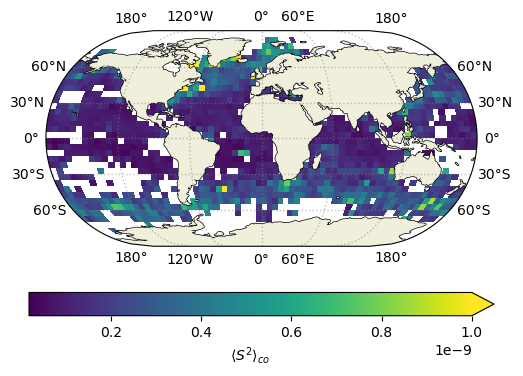

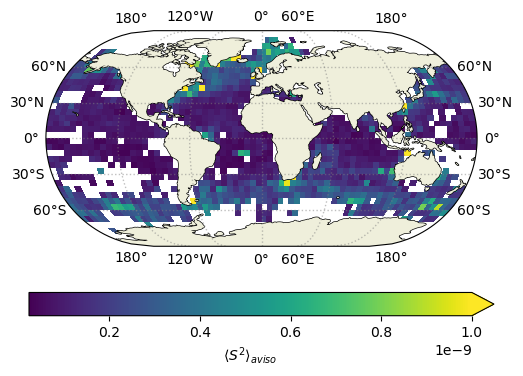

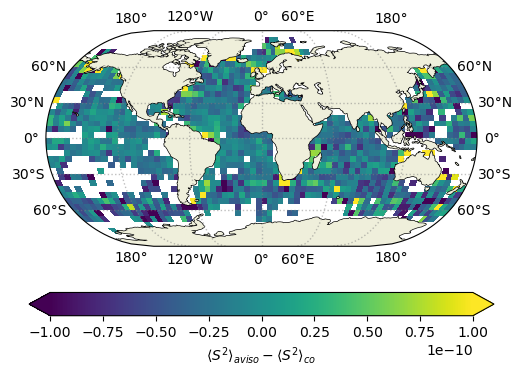

In [19]:
# CO 
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1, projection=ccrs.EckertIII(central_longitude=0))
ax.add_feature(cfeature.LAND, zorder=2)
dsm['sum_'+id_co].attrs = {'long_name':r'$\langle S^2 \rangle_{co}$'}
dsm['sum_'+id_co].plot(x='lonbin', y='latbin', cmap='viridis', vmax = 1e-9,  ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'location':'bottom'})
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle=':')

# AVISO
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1, projection=ccrs.EckertIII(central_longitude=0))
ax.add_feature(cfeature.LAND, zorder=2)
dsm['sum_'+id_aviso].attrs = {'long_name':r'$\langle S^2 \rangle_{aviso}$'}
dsm['sum_'+id_aviso].plot(x='lonbin', y='latbin', cmap='viridis', vmax = 1e-9, ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'location':'bottom'})
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle=':')

# DIFF 
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1, projection=ccrs.EckertIII(central_longitude=0))
ax.add_feature(cfeature.LAND, zorder=2)
diff = dsm['sum_'+id_aviso]-dsm['sum_'+id_co]
diff.attrs = {'long_name':r'$\langle S^2 \rangle_{aviso} - \langle S^2 \rangle_{co}$'}
diff.plot(x='lonbin', y='latbin', cmap='viridis', vmax = 1e-10, ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'location':'bottom'})
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle=':')

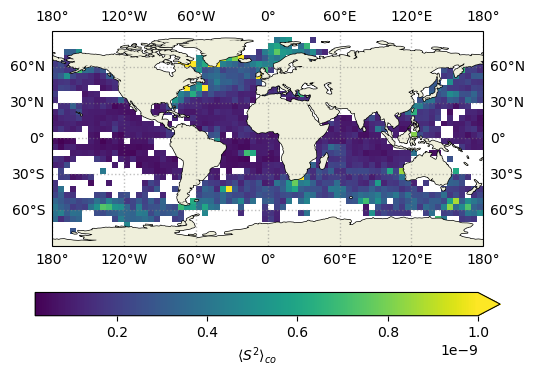

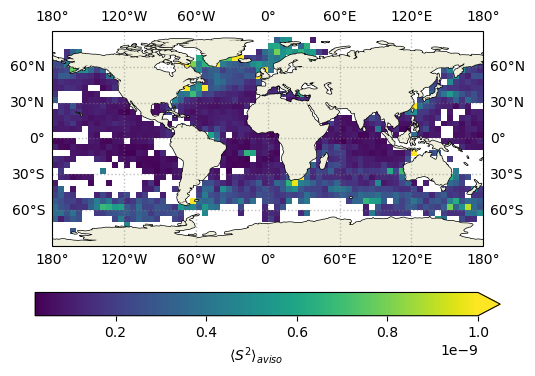

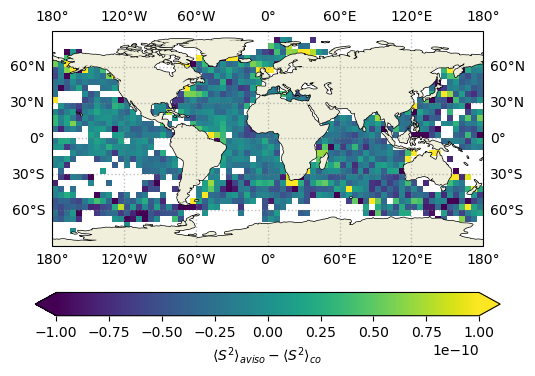

In [20]:
# CO 
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=2)
dsm['sum_'+id_co].attrs = {'long_name':r'$\langle S^2 \rangle_{co}$'}
dsm['sum_'+id_co].plot(x='lonbin', y='latbin', cmap='viridis', vmax = 1e-9,  ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'location':'bottom'})
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle=':')

# AVISO
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=2)
dsm['sum_'+id_aviso].attrs = {'long_name':r'$\langle S^2 \rangle_{aviso}$'}
dsm['sum_'+id_aviso].plot(x='lonbin', y='latbin', cmap='viridis', vmax = 1e-9, ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'location':'bottom'})
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle=':')

# DIFF 
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=2)
diff = dsm['sum_'+id_aviso]-dsm['sum_'+id_co]
diff.attrs = {'long_name':r'$\langle S^2 \rangle_{aviso} - \langle S^2 \rangle_{co}$'}
diff.plot(x='lonbin', y='latbin', cmap='viridis', vmax = 1e-10, ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'location':'bottom'})
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle=':')

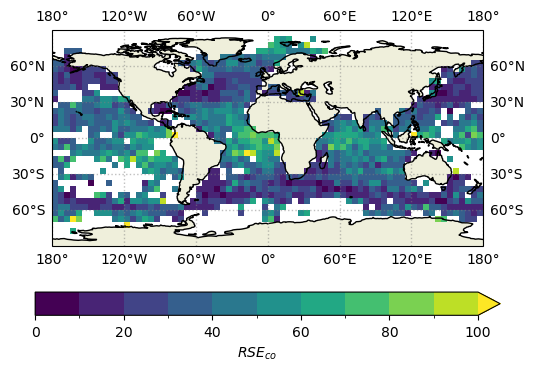

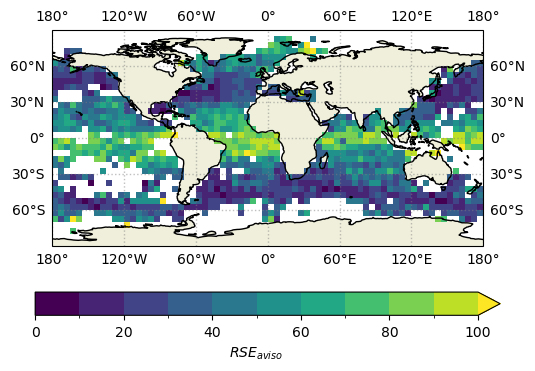

In [21]:
def compute_sum_ms(ds, id_, dic=None):
    if dic == None :
        dic = ds['sum_'+id_].attrs
    return ds[dic['acc']]+ds[dic['coriolis']]+ds[dic['ggrad']]+ds[dic['wind']]
    
def RSE_id(ds, id_, dic):
    acc = ''+dic['acc']
    cor = ''+dic['coriolis']
    ggrad = ''+dic['ggrad']
    wd = ''+dic['wind']
    return ds['sum_'+id_]/(ds[acc]+ds[cor]+ds[ggrad]+ds[wd])*100

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
RSE = RSE_id(dsm, id_co, id_co_dic )
RSE.attrs = {'long_name':r'$RSE_{co}$'}
RSE.plot(x='lonbin', y='latbin', cmap='viridis', levels=11, vmin = 0, vmax = 100, ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'location':'bottom'})
ax.add_feature(cfeature.LAND)
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle=':')


fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
RSE = RSE_id(dsm, id_aviso, id_aviso_dic )
RSE.attrs = {'long_name':r'$RSE_{aviso}$'}
RSE.plot(x='lonbin', y='latbin', cmap='viridis', levels=11,vmin = 0, vmax = 100, ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'location':'bottom'})
ax.add_feature(cfeature.LAND)
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle=':')

______________________
# $x$ contribution : $Rc_{x_i} = \frac{\langle S_{-x_i}^2\rangle-\langle S^2 \rangle}{\sum_i \langle x_i^2 \rangle}$
## Under H1 :
$Rc_{x_i} = \frac{\langle \hat{x}^2 \rangle - \langle {x_i^{e}}^2\rangle}{\sum_i \langle x_i^2 \rangle}$  

 - $RC_{x_i}<0 \Leftrightarrow \langle \hat{x}^2 \rangle < \langle {x_i^{e}}^2\rangle$ more error than signal is added
 - $RC_{x_i}>0 \Leftrightarrow \langle \hat{x}^2 \rangle > \langle {x_i^{e}}^2\rangle$ more signal than error is added
 - The bigger $Rc_x$ is, the better closure we have
Results :
 - $RC_x$<0 for inertial acceleration and wind

In [22]:
def plot_stat_lonlat(variables, ds=1, cmap='viridis', title =1 , cmap_label =1 ,fig_title=1,**kwargs):
    lv = len(variables)
    if isinstance(variables[0],str):
        variables = [ds[v] for v in variables]
        if isinstance(ds, int) : 
            assert False, 'give dataset'
    nrows = int(np.ceil(lv/2))
    ncols = 2
    if lv == 1:
        nrows = 1
        ncols = 1
    # Define the figure and each axis for the 3 rows and 3 columns
    fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                            subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(15,nrows*4))

    # axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
    if lv !=1:
        axs=axs.flatten()
    else : axs = [axs]

    #Loop over all of the variables
    for i in range(lv):

            # Contour plot
            if cmap_label != 1:
                variables[i].assign_attrs({'long_name':cmap_label[i]}).plot(x='lonbin', y='latbin', cmap=cmap, ax=axs[i],**kwargs)

            else : 
                variables[i].plot(x='lonbin', y='latbin', cmap=cmap, ax=axs[i], **kwargs)
            
            # Title each subplot with the name of the model
            if title != 1:
                axs[i].set_title(title[i], fontsize=14)

            # Draw the coastines for each subplot
            axs[i].coastlines()
            axs[i].add_feature(cfeature.LAND)
            #gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
            #          linewidth=1, color='gray', alpha=0.5, linestyle=':')
            gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                                  linewidth=1, color='gray', alpha=0.5, linestyle=':', xlabel_style = {'color': 'w'}, ylabel_style = {'color': 'w'})
            gl.xlabels_top = False
            gl.ylabels_right = False
    if isinstance(fig_title, str):
        fig.suptitle(fig_title)
    fig.tight_layout(rect=[0,0,1,1])#left, bottom, right, top (default is 0,0,1,1)
    # Delete the unwanted axes
    if lv !=1:
        for i in np.arange(lv,nrows*2):
            fig.delaxes(axs[i])

In [23]:
def plot_ms_lonlat(variables, ds, id_, dic, title=1, **kwargs):
    ticks = [r'$d_tu$', r'$-fv$', r'$g \partial_x \eta$', r'$\frac{1}{\rho}\partial_z\tau_x$']
    plot_stat_lonlat(variables, ds=ds, title = [r'$x =$'+ticks[i] for i in range(len(ticks))], **kwargs)

In [24]:
def RC_x(ds, id_, dic=None):
    if isinstance(id_, str):
        lab = ['acc', 'coriolis', 'ggrad', 'wind']
        s = compute_sum_ms(ds, id_, dic)
        Rc_x = xr.Dataset()
        for l in lab :
            Rc_x[l] = (ds['exc_'+l+'_'+id_] - ds['sum_'+id_])#/s*100
    return Rc_x
RCX = xr.concat([RC_x(dsm, id_co, dic = id_co_dic), RC_x(dsm, id_co, dic = id_co_dic)], dim =pd.Index([id_co, id_aviso], name='id_comb')) 

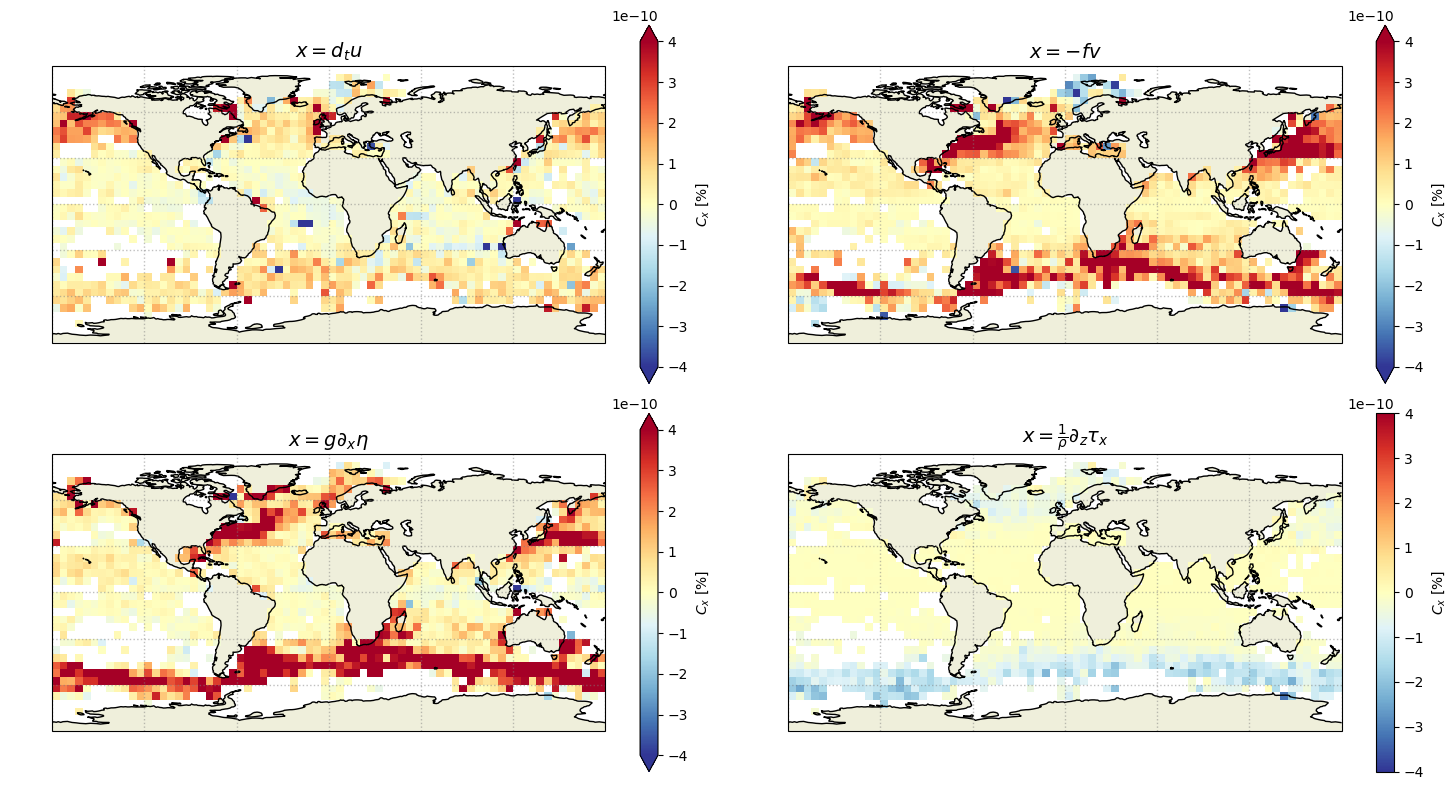

In [56]:
plot_ms_lonlat(['acc', 'coriolis', 'ggrad', 'wind'],RCX.sel(id_comb =id_co), id_co, id_co_dic, cmap_label = [r'$C_{x}$ [%]']*4, cmap = 'RdYlBu_r',vmin=-4e-10, vmax =4e-10)
              

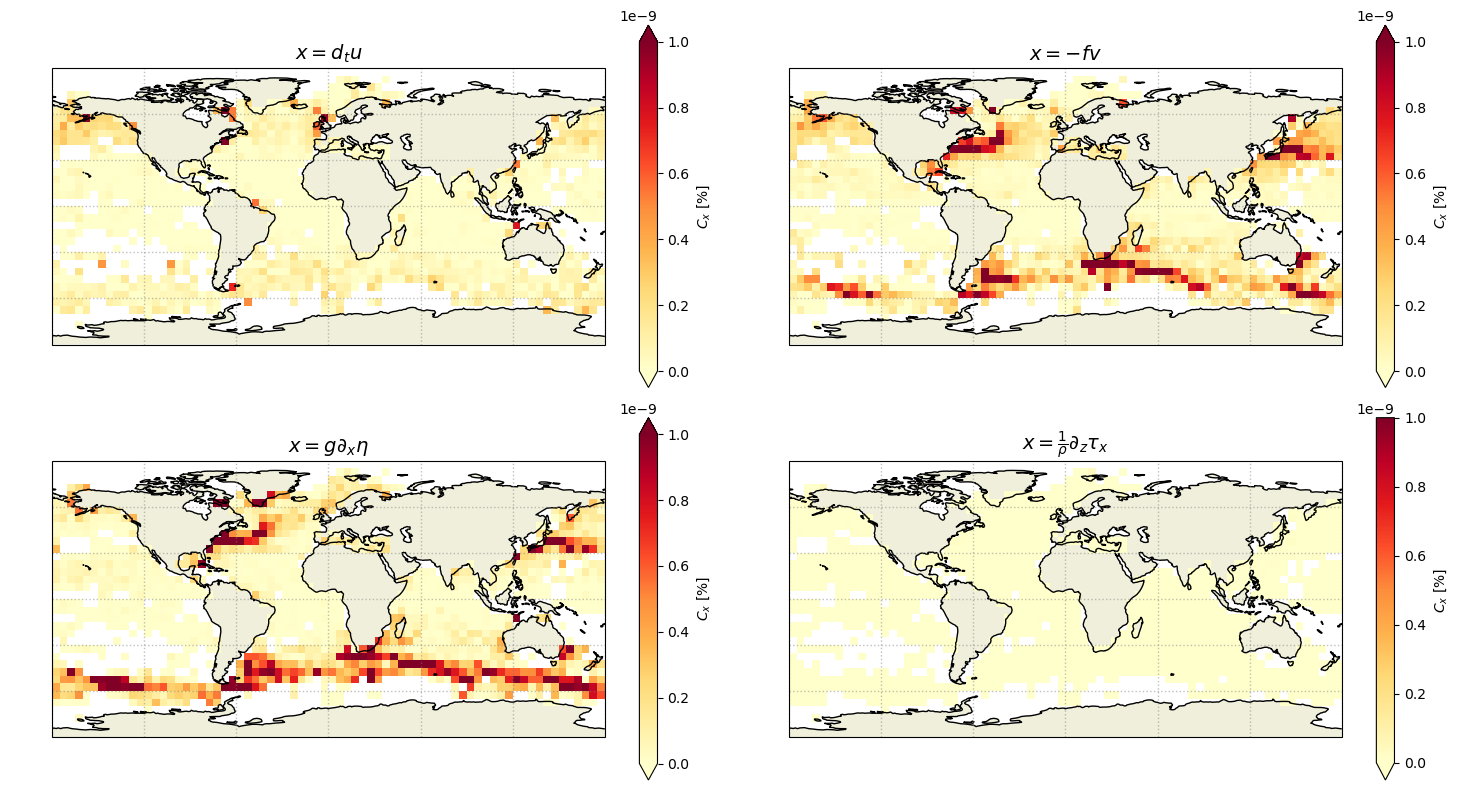

In [59]:
plot_ms_lonlat(['acc', 'coriolis', 'ggrad', 'wind'],RCX.sel(id_comb =id_co), id_co, id_co_dic, cmap_label = [r'$C_{x}$ [%]']*4, cmap = 'YlOrRd',vmin=0, vmax =10e-10)
              

________________________
# True/Error in $x$ 
$\langle \hat{x_i} \rangle +\langle \hat{x_i}{x_i^{e}}^2 \rangle  = \frac{1}{2}(\langle x_i^2 \rangle - \langle S^2 \rangle +\langle S_{-x_i}^2 \rangle) $  

$\langle {x_i^{e}}^2 \rangle+\langle \hat{x_i}{x_i^{e}}^2 \rangle  = \frac{1}{2}(\langle x_i^2 \rangle + \langle S^2 \rangle -\langle S_{-x_i}^2 \rangle) $
## Under H1

$\langle \hat{x_i} \rangle  = \frac{1}{2}(\langle x_i^2 \rangle - \langle S^2 \rangle +\langle S_{-x_i}^2 \rangle) $  

$\langle {x_i^{e}}^2 \rangle  = \frac{1}{2}(\langle x_i^2 \rangle + \langle S^2 \rangle -\langle S_{-x_i}^2 \rangle) $

In [26]:
def true_err_x(ds, id_, dic) :
    dso = xr.Dataset()
    for x in ['acc', 'coriolis', 'ggrad', 'wind']:
        X =dic[x]
        dso[x] = ds[X]
        dso['exc_'+x] = ds['exc_' + x +'_'+ id_]
        dso['true_'+x] = (ds[X] - ds['sum_'+id_] + ds['exc_' + x +'_'+ id_])/2
        dso['err_'+x] = (ds[X] + ds['sum_'+id_] - ds['exc_' + x +'_'+ id_])/2
    dso['S'] = ds['sum_'+id_]
    return dso
dsmss = xr.concat([true_err_x(dsm, id_co, id_co_dic), true_err_x(dsm, id_aviso, id_aviso_dic)], dim=pd.Index([id_co, id_aviso], name = 'id_comb'))

In [27]:
dsmssco = dsmss.sel(id_comb =id_co)
s = compute_sum_ms(dsm, id_co, id_co_dic)
true_s = [dsmssco['true_'+v]/s for v in ['acc', 'coriolis', 'ggrad', 'wind']]

In [28]:
norm_err = [dsmssco['err_'+v]/dsmssco[v] for v in ['acc', 'coriolis', 'ggrad', 'wind']]

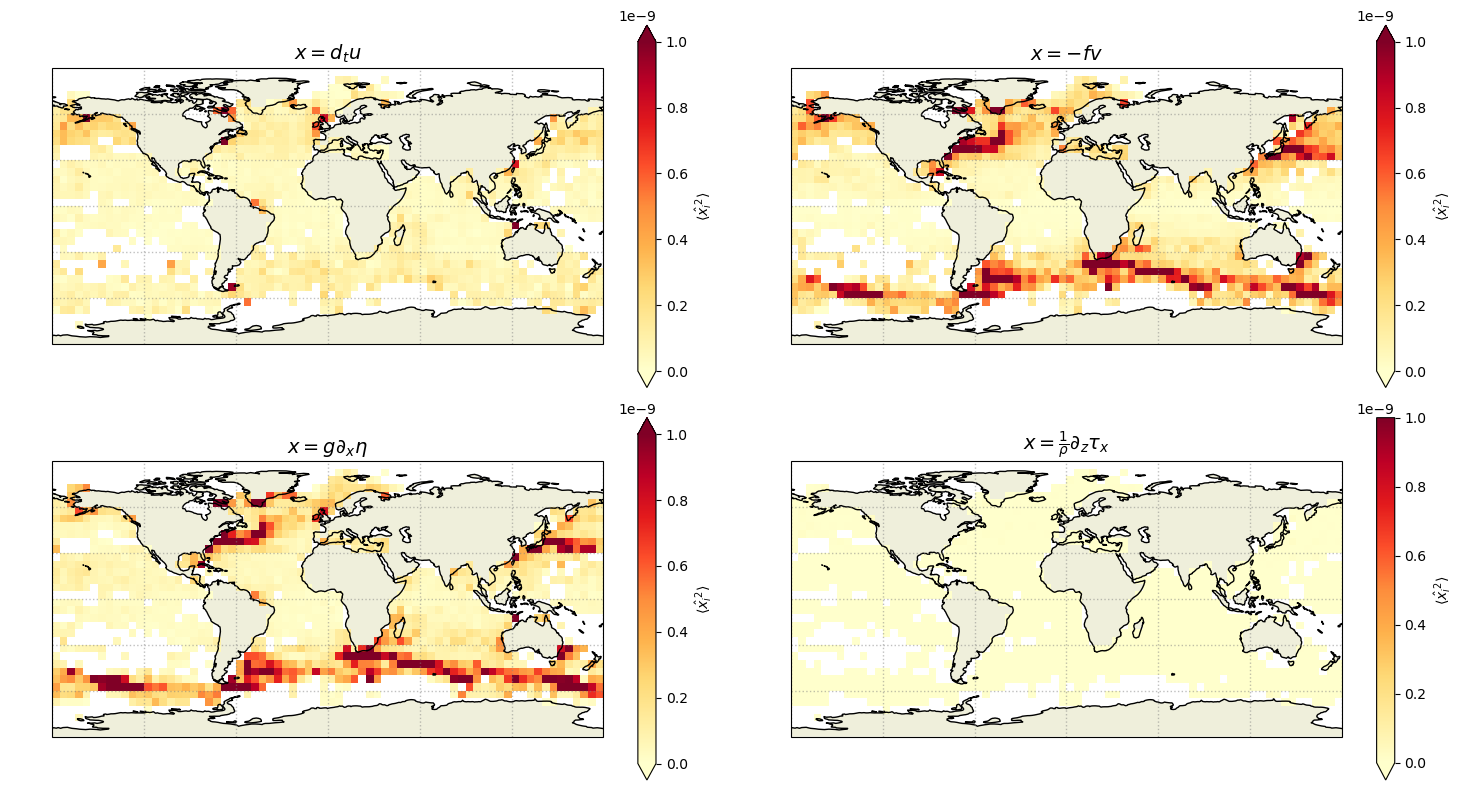

In [50]:
plot_ms_lonlat(['true_'+v for v in ['acc', 'coriolis', 'ggrad', 'wind']], dsmss.isel(id_comb =0), id_co, id_co_dic, vmin=0, vmax = 10e-10,cmap = 'YlOrRd', cmap_label = [r'$\langle \hat{x_i}^2 \rangle$']*4,)

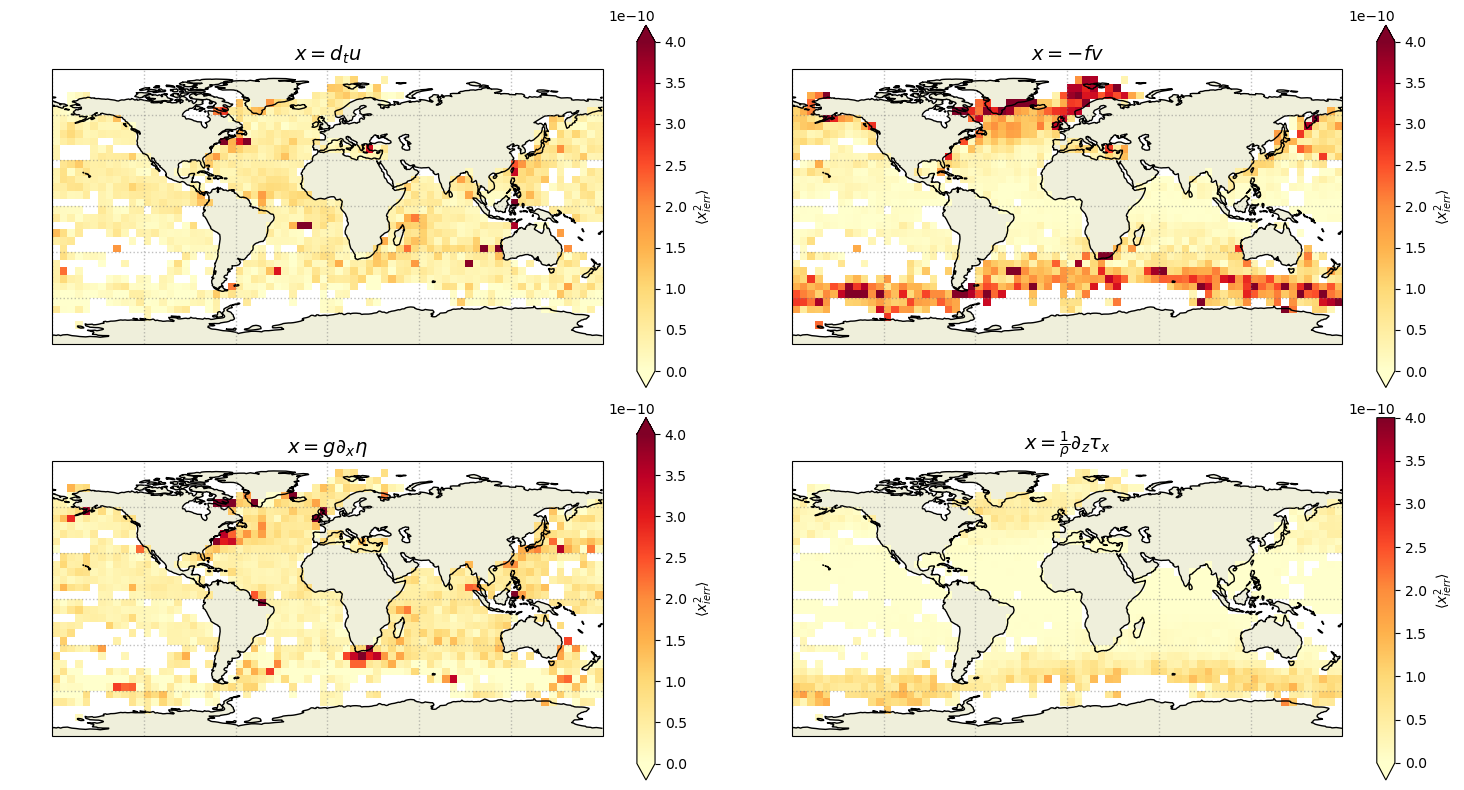

In [51]:
plot_ms_lonlat(['err_'+v for v in ['acc', 'coriolis', 'ggrad', 'wind']], dsmss.isel(id_comb =0), id_co, id_co_dic, cmap = 'YlOrRd',vmin=0,vmax=4e-10, cmap_label = [r'$\langle x_{ierr}^2 \rangle$']*4)

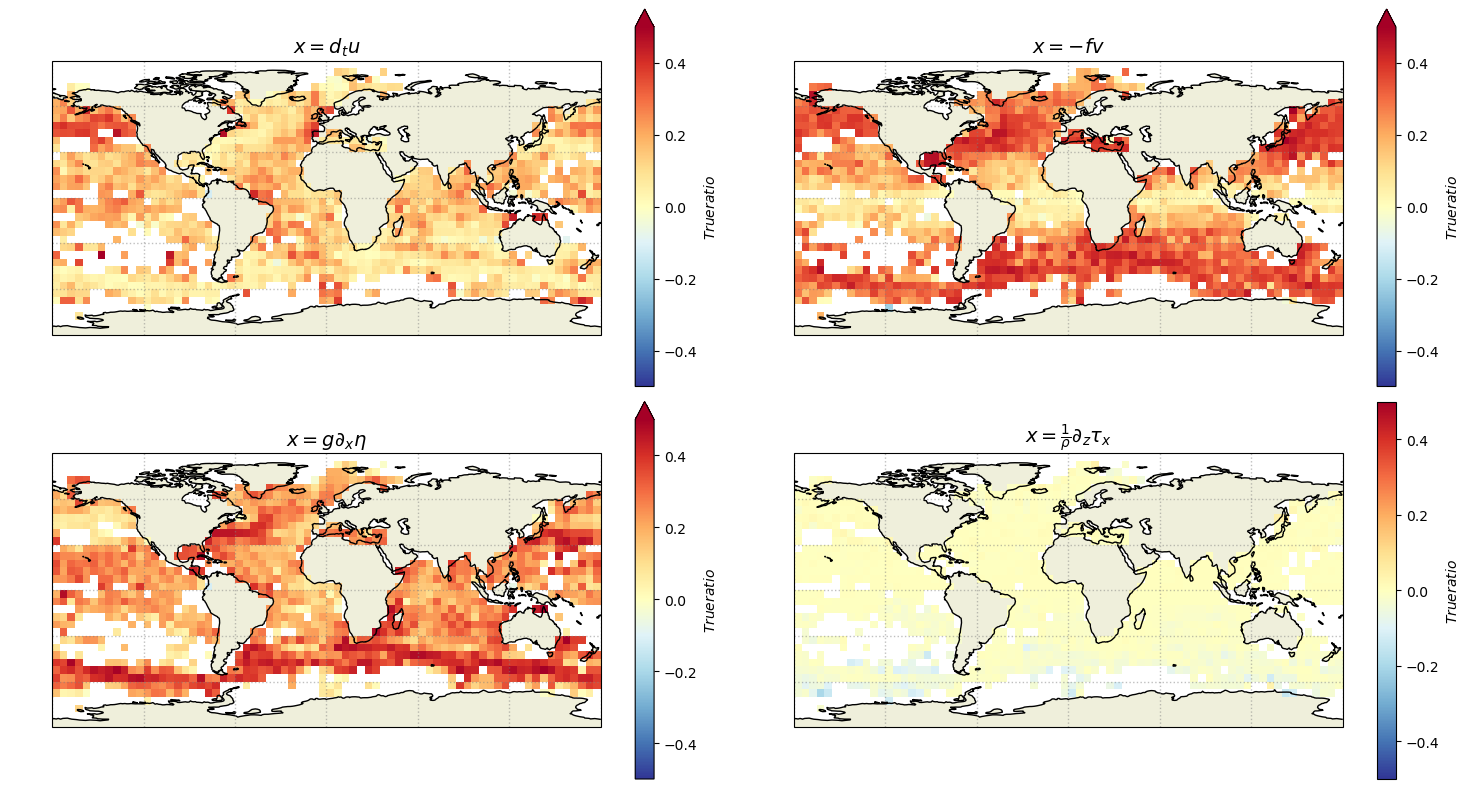

In [32]:
plot_ms_lonlat(true_s,1, id_co, id_co_dic,vmin=-0.5, vmax=0.5,  cmap = 'RdYlBu_r', cmap_label = [r'$True ratio$']*4,)

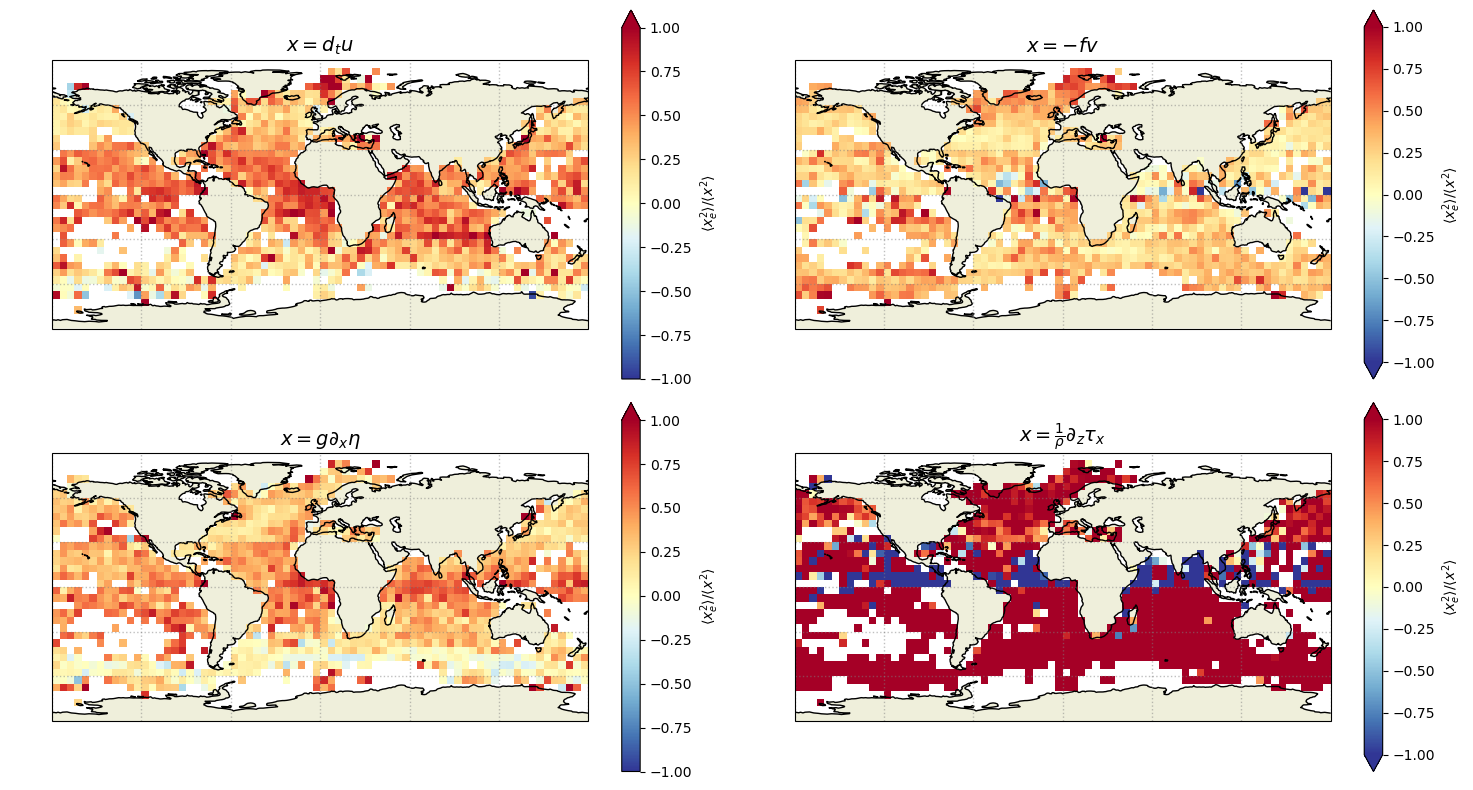

In [33]:
plot_ms_lonlat(norm_err,1, id_co, id_co_dic,vmin=-1, vmax=1,  cmap = 'RdYlBu_r', cmap_label = [r'$\langle x_e^2\rangle / \langle x^2 \rangle$']*4,)

In [34]:
cluster.close()

NameError: name 'cluster' is not defined